In [1]:
import sys
import os
import torch
import torch.nn as nn
import numpy as np

sys.path.append("./")

In [2]:
from autoencode import AEEnsemble
from datasets import UnsupervisedDataset, SupervisedDataset

In [3]:
unsup_data = UnsupervisedDataset("/export/gaon1/data/jteneggi/DL/alm", session_idx=[0, 42, 29, 83, 55])

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "5"
device = "cuda:0" if torch.cuda.is_available() else "cpu"

ae = AEEnsemble(
    optim=torch.optim.Adam,
    convolutional_encoding=False, 
    batch_size=128, 
    epochs=25, 
    lr=(0.0001, 0.0001, 0.0001),
    device=device, 
    activ=nn.ReLU
)

Using cuda:0
Using cuda:0
Using cuda:0
Using cuda:0
Using cuda:0
Using cuda:0


In [5]:
loss_history = ae.fit(unsup_data)
ae.save(prefix="real")


EPOCH 1 of 25

EPOCH 2 of 25

EPOCH 3 of 25

EPOCH 4 of 25

EPOCH 5 of 25

EPOCH 6 of 25

EPOCH 7 of 25

EPOCH 8 of 25

EPOCH 9 of 25

EPOCH 10 of 25

EPOCH 11 of 25

EPOCH 12 of 25

EPOCH 13 of 25

EPOCH 14 of 25

EPOCH 15 of 25

EPOCH 16 of 25

EPOCH 17 of 25

EPOCH 18 of 25

EPOCH 19 of 25

EPOCH 20 of 25

EPOCH 21 of 25

EPOCH 22 of 25

EPOCH 23 of 25

EPOCH 24 of 25

EPOCH 25 of 25


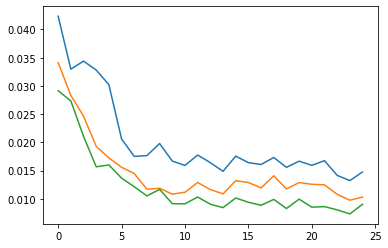

In [6]:
import matplotlib.pyplot as plt
for ae_loss in loss_history:
    plt.plot(ae_loss)

torch.Size([23, 39])


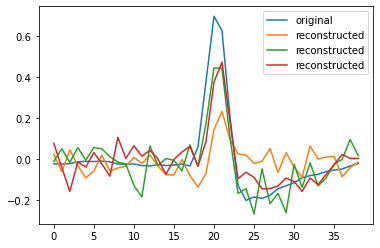

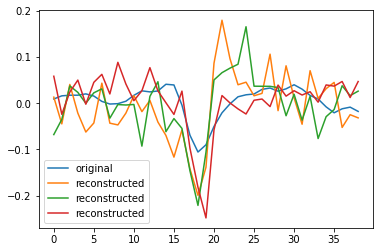

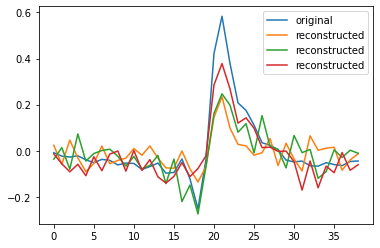

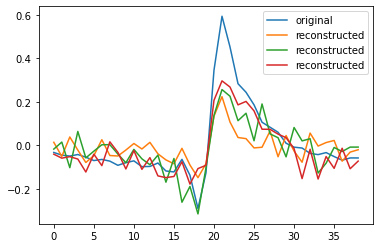

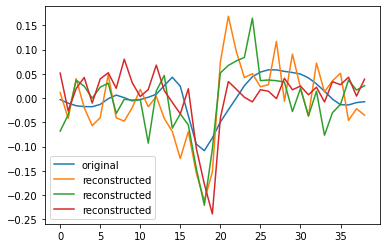

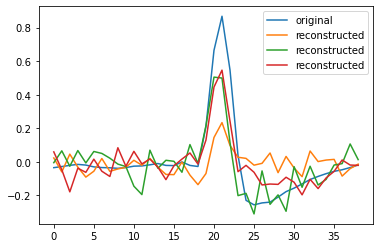

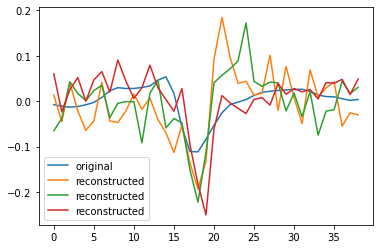

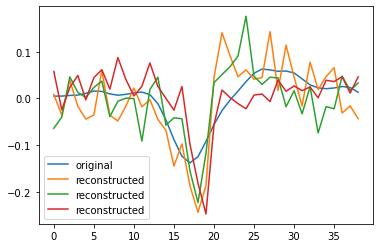

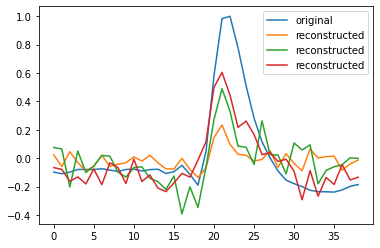

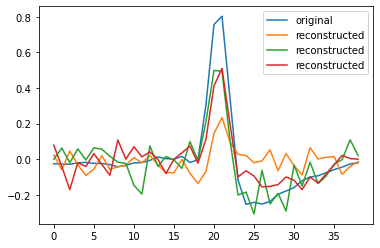

In [7]:
device = torch.device("cuda:0")

spikes, _ = unsup_data[0]
spikes = torch.from_numpy(spikes).float().to(device)
print(spikes.size())
for e, d in zip(ae.encoders, ae.decoders):
    e.eval()
    d.eval()
for spike in spikes[:10]:
    spike = spike.unsqueeze(0)
    latent_vecs = [e(spike) for e in ae.encoders]
    reconstructed = [d(latent_vecs[i]) for i, d in enumerate(ae.decoders)]    
    plt.plot(spike.squeeze().detach().cpu(), label="original")
    for r in reconstructed:
        plt.plot(r.squeeze().detach().cpu(), label="reconstructed")
    plt.legend()
    plt.show()